In [48]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import scipy.stats as stats 
import pylab


#Normalize Data 
from sklearn.preprocessing import StandardScaler

# Concert Categorical to Numerical Value 
from sklearn.preprocessing import LabelEncoder

#Columns Relationship for target value 
from sklearn.feature_selection import mutual_info_regression

# Spilitting Data
from sklearn.model_selection import train_test_split,cross_val_score

#PCA
from sklearn.decomposition import PCA

#Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

#Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
df = pd.read_csv('Book wwc22 final version.csv',)
df

,Match_id,Team_1,Team_2,Venue,Stage,Toss_winner,Toss_decision,First_innings_score,First_innings_wkts,Second_innings_score,Second_innings_wkts,Winner,Player_of_the_match
0,1,New Zealand,West Indies,"Bay Oval, Mount Maunganui",Group,New Zealand,Field,259,9,256.0,10.0,West Indies,Hayley Matthews
1,2,Bangladesh,South Africa,"University Oval, Dunedin",Group,Bangladesh,Field,207,10,175.0,10.0,South Africa,Ayabonga Khaka
2,3,Australia,England,"Seddon Park, Hamilton",Group,England,Field,310,3,298.0,8.0,Australia,Rachael Haynes
3,4,Pakistan,India,"Bay Oval, Mount Maunganui",Group,India,Bat,244,7,137.0,10.0,India,Pooja Vastrakar
4,5,New Zealand,Bangladesh,"University Oval, Dunedin",Group,New Zealand,Field,140,8,144.0,1.0,New Zealand,Suzie Bates
5,6,Australia,Pakistan,"Bay Oval, Mount Maunganui",Group,Australia,Field,190,6,193.0,3.0,Australia,Alyssa Healy
6,7,West Indies,England,"University Oval, Dunedin",Group,West Indies,Bat,225,6,218.0,10.0,West Indies,Shemaine Campbelle
7,8,New Zealand,India,"Seddon Park, Hamilton",Group,India,Field,260,9,198.0,10.0,New Zealand,Amy Satterthwait
8,9,Pakistan,South Africa,"Bay Oval, Mount Maunganui",Group,Pakistan,Field,223,9,217.0,10.0,South Africa,Shabnim Ismail
9,10,West Indies,India,"Seddon Park, Hamilton",Group,India,Bat,317,8,162.0,10.0,India,Smriti Mandhana


In [232]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Match_id              31 non-null     int64  
 1   Team_1                31 non-null     object 
 2   Team_2                31 non-null     object 
 3                Venue    31 non-null     object 
 4   Stage                 31 non-null     object 
 5   Toss_winner           31 non-null     object 
 6   Toss_decision         31 non-null     object 
 7   First_innings_score   31 non-null     int64  
 8   First_innings_wkts    31 non-null     int64  
 9   Second_innings_score  30 non-null     float64
 10  Second_innings_wkts   30 non-null     float64
 11  Winner                31 non-null     object 
 12  Player_of_the_match   30 non-null     object 
dtypes: float64(2), int64(3), object(8)
memory usage: 3.3+ KB


In [233]:
df.describe()


,Match_id,First_innings_score,First_innings_wkts,Second_innings_score,Second_innings_wkts
count,31.000000,31.000000,31.000000,30.000000,30.000000
mean,16.000000,220.741935,7.451613,187.333333,7.566667
std,9.092121,72.708077,2.046765,59.716764,3.092631
min,1.000000,61.000000,3.000000,90.000000,1.000000
25%,8.500000,165.000000,6.000000,136.000000,5.250000
50%,16.000000,234.000000,8.000000,184.000000,9.000000
75%,23.500000,270.000000,9.000000,228.000000,10.000000
max,31.000000,356.000000,10.000000,298.000000,10.000000


C:\Users\prasa\AppData\Local\Temp\ipykernel_3840\1846685250.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["First_innings_score"],kde=True , color="deepskyblue",bins=10)


<Axes: xlabel='First_innings_score', ylabel='Density'>

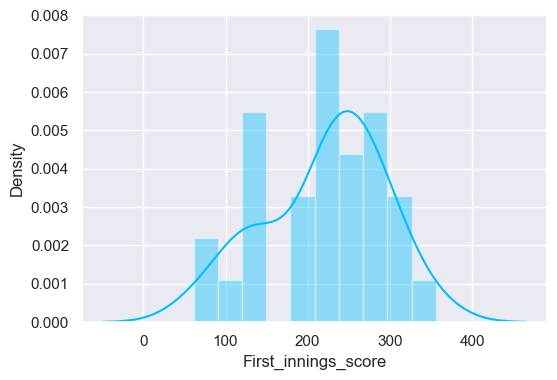

In [234]:
sns.set(rc ={"figure.figsize":(6,4)})
sns.distplot(df["First_innings_score"],kde=True , color="deepskyblue",bins=10)

C:\Users\prasa\AppData\Local\Temp\ipykernel_3840\3331813220.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["First_innings_wkts"],kde=True, color = "crimson",bins = 10 )


<Axes: xlabel='First_innings_wkts', ylabel='Density'>

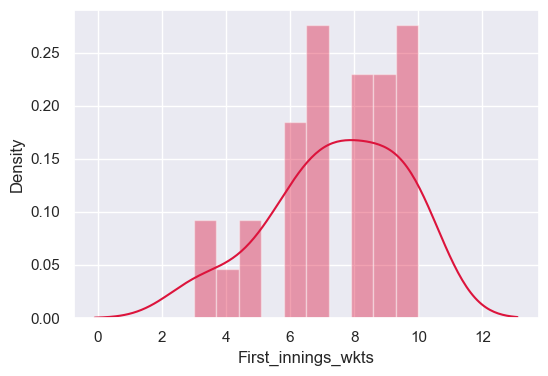

In [235]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["First_innings_wkts"],kde=True, color = "crimson",bins = 10 )

C:\Users\prasa\AppData\Local\Temp\ipykernel_3840\2913002571.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Second_innings_score"],kde=True, color = "maroon",bins = 10 )


<Axes: xlabel='Second_innings_score', ylabel='Density'>

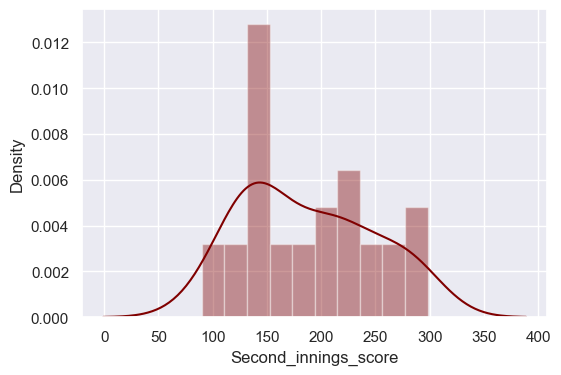

In [236]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["Second_innings_score"],kde=True, color = "maroon",bins = 10 )

C:\Users\prasa\AppData\Local\Temp\ipykernel_3840\2763924452.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Second_innings_wkts"],kde=True, color = "steelblue",bins = 10 )


<Axes: xlabel='Second_innings_wkts', ylabel='Density'>

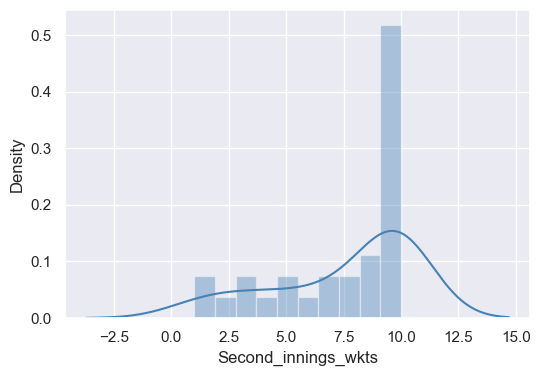

In [237]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["Second_innings_wkts"],kde=True, color = "steelblue",bins = 10 )

In [238]:
df.duplicated().sum()

0

### Check And Remove NaN values


In [239]:
df.isnull().sum()

Match_id                0
Team_1                  0
Team_2                  0
             Venue      0
Stage                   0
Toss_winner             0
Toss_decision           0
First_innings_score     0
First_innings_wkts      0
Second_innings_score    1
Second_innings_wkts     1
Winner                  0
Player_of_the_match     1
dtype: int64

In [240]:
# Remove Outliers
num_colums = df.select_dtypes(include = ['int64','float64'])
plt.figure(figsize=(15,6))
                        

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

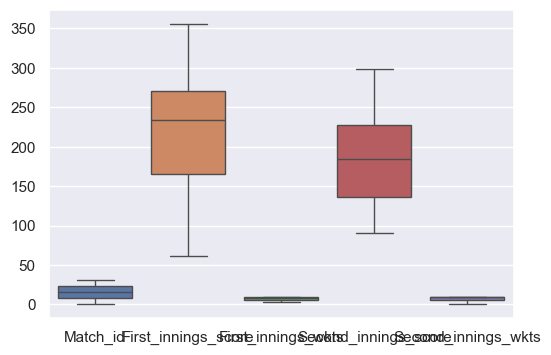

In [241]:
sns.boxplot(data=num_colums)
plt.show()

In [242]:
def remove_outliers(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range =Q1 -(1.5 * IQR)
    upper_range =Q3 +(1.5 * IQR)
    return lower_range,upper_range

In [243]:
for i in df.columns:
    lower_range,upper_range = remove_outliers(df[i])
    df[i] =np.where(df[i] > upper_range,upper_range,df[i])
    df[i]= np.where(df[i] < lower_range,lower_range,df[i])

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
# check the Outliers 
num_colums =df.select_dtypes(include = ['int64','float64'])
plt.figure(figsize=(15,6))

#num_colums.boxplot()
sns.boxplot(data = num_colums)
plt.show()

## Bivariat Analysis 

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="First_innings_score",y="First_innings_wkts",data=df)
plt.show()
            

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="Second_innings_score",y="Second_innings_wkts",data=df)
plt.show()
            

In [ ]:
sns.pairplot(df)
plt.show()

# 6. Feature Engineering 

In [5]:
x = df.iloc[:,7:11] # positive Indexing 
x.fillna(0, inplace=True)

In [6]:
x.head()

,First_innings_score,First_innings_wkts,Second_innings_score,Second_innings_wkts
0,259,9,256.0,10.0
1,207,10,175.0,10.0
2,310,3,298.0,8.0
3,244,7,137.0,10.0
4,140,8,144.0,1.0


In [7]:
y = df.iloc[:,-4] # Negative Indexing 
y.fillna(0, inplace=True)

In [8]:
y.head()

0    256.0
1    175.0
2    298.0
3    137.0
4    144.0
Name: Second_innings_score, dtype: float64

In [9]:
from sklearn.feature_selection import mutual_info_regression
match = mutual_info_regression(x,y)
match =pd.Series(match)
match.index=x.columns
match.sort_values(ascending=True)

First_innings_wkts      0.000000
Second_innings_wkts     0.113613
First_innings_score     0.699625
Second_innings_score    2.102514
dtype: float64

<Axes: >

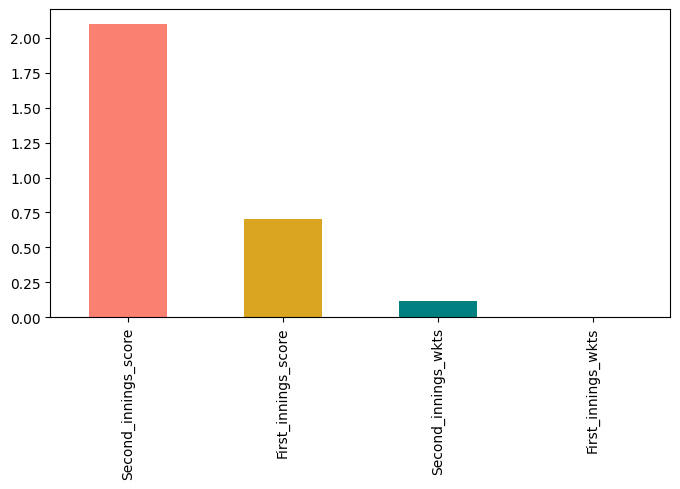

In [10]:
colors = ['salmon','goldenrod','teal']
match.sort_values(ascending = False).plot.bar(figsize=(8,4),color=colors)

In [13]:
# Assuming 'x' is a DataFrame
X=x[["Second_innings_score", "First_innings_score"]]

### Splitting Data Train and Test

In [16]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(X, y, test_size=0.2, random_state=0)


In [17]:
print("train_data : ",train_data.shape)
print("train_label : ",train_label.shape)
print("test_data : ",test_data.shape)
print("test_label : ",test_label.shape)

train_data :  (24, 2)
train_label :  (24,)
test_data :  (7, 2)
test_label :  (7,)


In [22]:
sc=StandardScaler()
train_data_sc = sc.fit_transform(train_data)
test_data_sc = sc.fit_transform(test_data)


In [24]:
train_data_sc.shape

(24, 2)

# 7 Model


### Linear Model 

In [25]:
model_lr =LinearRegression().fit(train_data_sc,train_label)

In [26]:
model_lr.score(train_data_sc,train_label)

1.0

In [27]:
y_pred =model_lr.predict(test_data_sc)
y_pred

array([262.96133753, 177.0058342 , 162.4781435 , 160.05686172,
       249.03896727, 200.00801115,  82.57584464])

In [28]:
print("Mean Absolute Error : ",mean_absolute_error(y_pred,test_label))
print("Mean Squared Error : ",mean_squared_error(y_pred,test_label))
print("R2_Score : ",r2_score(y_pred,test_label))

Mean Absolute Error :  33.30348434363084
Mean Squared Error :  1593.479155472712
R2_Score :  0.49500615198481324


In [30]:
print("Train Data Cross_val_Score : ",cross_val_score(model_lr,test_data_sc,test_label,cv=6).mean())
print("Test Data Cross_val_score : ",cross_val_score(model_lr,test_data_sc,test_label,cv=6).mean())

Train Data Cross_val_Score :  nan
Test Data Cross_val_score :  nan


C:\Users\prasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\prasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\prasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\prasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\prasa\AppData\Local\Programs\Python\Python312\L

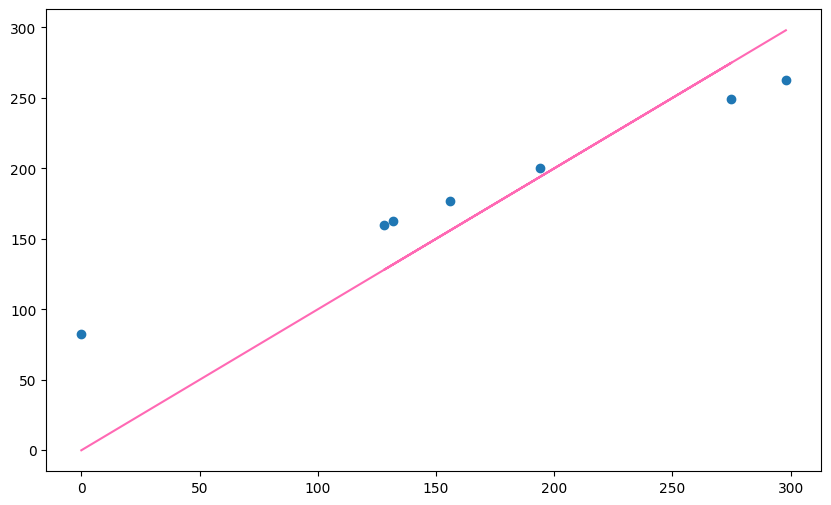

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(test_label,y_pred)
plt.plot(test_label,test_label,'hotpink')

## Random Forest Model

In [39]:
model_rf = RandomForestRegressor().fit(train_data_sc,train_label)
y_pred_2=model_rf.predict(test_data_sc)

Mean Absolute Error :  34.82285714285714
Mean Squared Error :  1944.9928
R2_Score :  0.3255507143482185


In [40]:
print("Mean Absolute Error : ",mean_absolute_error(y_pred_2,test_label))
print("Mean Squared Error : ",mean_squared_error(y_pred_2,test_label))
print("R2_Score : ",r2_score(y_pred_2,test_label))

Mean Absolute Error :  34.82285714285714
Mean Squared Error :  1944.9928
R2_Score :  0.3255507143482185


In [47]:
print("Train Data Cross_val_score : ",cross_val_score(model_rf,train_data_sc,train_label,cv=5).mean())
print("Test Data Cross_val_score : ",cross_val_score(model_rf,test_data_sc,test_label,cv=5).mean())

Train Data Cross_val_score :  0.9422192762102217


C:\Users\prasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\prasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Test Data Cross_val_score :  nan


C:\Users\prasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


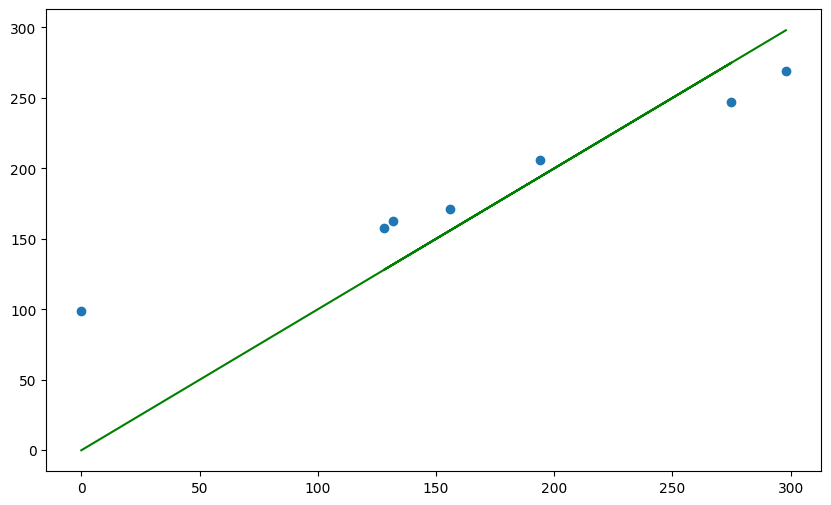

In [43]:
plt.figure(figsize=(10,6))
plt.scatter(test_label,y_pred_2)
plt.plot(test_label,test_label,'green')